<a href="https://colab.research.google.com/github/Jevs9/Inmersion_Datos1/blob/main/INMERSION_DATOS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASE 02** <br>
Biblioteca matplotlib y [seaborn]https://seaborn.pydata.org/)<br>
más sobre [String](https://docs.python.org/es/3/library/string.html)

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/CURSOS/ALURA/InmersionPython/1_clase01/material/inmuebles_bogota.csv')
columnas = {'Baños':'Banos', 'Área':'Area'}
inmuebles = inmuebles.rename(columns = columnas)
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


E lproblema planteado es calcular el valor económico del metro cuadrado. Como se nota en la linea de código anterior la columna Valor tiene datos de tipo object (combinación de caracteres alfanuméricos)

In [71]:
inmuebles.Valor[0]

'$ 360.000.000'

In [72]:
type(inmuebles.Valor[0])

str

Vamos a tratar de convertir los valores string de la columna VALOR a valores numericos, esto con el fin de poder operar con los valores contenidos en cada celda.

In [73]:
inmuebles.Valor[0].split()

['$', '360.000.000']

Con la propiedad split() se separa una cadena de texto deacuerdo a un prámetro establecido, en caso de NO definir un párámetro se tiene por defecto "espacio"

In [74]:
inmuebles.Valor.str.split(expand=True)

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


Con el .str podemos aplicar la propiedad split a todos los elementos de la columna. con el expand(true) me devuuelve la conversión que hace en un dataframe (esto es, el valor de peso en una columna y el número con puntos en otra) si no colocamos el expand en True se retorna una serie como se ve a continuación:

In [75]:
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

Vamos añadir dos nuevas columnas a dataframe principal, una con el símbolo de pesos y otra con el valor de moneda.

In [76]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
6360,Apartamento,Apartamento en venta en Chico Norte,2,2,81,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 620.000.000,$,620.000.000
2242,Apartamento,Apartamento en venta en Kennedy,3,2,55,Kennedy,Kennedy Central,$ 235.000.000,$,235.000.000
7940,Casa,Casa en venta en Kennedy,4,2,132,Kennedy,Kennedy Central,$ 185.000.000,$,185.000.000


In [77]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


Aún NO se tiene como valor numérico los valores de la columana Precio, vamos a sustiruir esos puntos. OJO con el regex del final

In [78]:
inmuebles['Precio'] = inmuebles.Precio.str.replace('.','', regex = True)

Para tomar solo dos columnas del dataframe original debo abrir doble [

In [79]:
inmuebles[['Barrio', 'Precio']]

,Barrio,Precio
0,Zona Noroccidental,360000000
1,Castilla,670000000
2,Chico Reservado,1120000000
3,Usaquén,890000000
4,Bella Suiza,970000000
...,...,...
9515,Kennedy,290000000
9516,Parque Central Bavaria,670000000
9517,Restrepo,900000000
9518,Engativa,335000000


In [80]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


Se va a transformar el tipo de dato de object a tipo numérico (float)

In [81]:
inmuebles['Precio_Millones'] = inmuebles.Precio.astype('float')/1000000

In [82]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tipo             9520 non-null   object 
 1   Descripcion      9520 non-null   object 
 2   Habitaciones     9520 non-null   int64  
 3   Banos            9520 non-null   int64  
 4   Area             9520 non-null   int64  
 5   Barrio           9520 non-null   object 
 6   UPZ              9478 non-null   object 
 7   Valor            9520 non-null   object 
 8   Moneda           9520 non-null   object 
 9   Precio           9520 non-null   object 
 10  Precio_Millones  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [83]:
inmuebles[['Barrio', 'Precio_Millones']]

,Barrio,Precio_Millones
0,Zona Noroccidental,360.00
1,Castilla,670.00
2,Chico Reservado,1120.00
3,Usaquén,890.00
4,Bella Suiza,970.00
...,...,...
9515,Kennedy,290.00
9516,Parque Central Bavaria,670.00
9517,Restrepo,900.00
9518,Engativa,335.00


Patra sacar diferentes tipos de valores estadisticos a toda nuestra dataframe podemos utilizar lo siguiente:

In [84]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millones
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


Mejorando posiciones decimales para facilitar la lectura de los datos.

In [85]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millones
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [86]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millones
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


Este puede ser un error en la inserción de datos.

Se va a mirar el comportamiento del valor económico de los inmuebles, utilizando un histograma, donde el eje x representa el valor en millones de pesos y el eje y la frecuencia en la que están estos inmuebles. De la gráfica se infiere que la mayoría de inmuebles están entre 0 y 2000 millones de pesos.

Los bins amplian en rango de visualización

<Axes: ylabel='Frequency'>

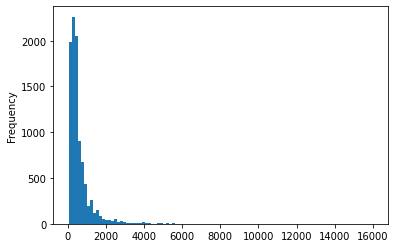

In [87]:
inmuebles['Precio_Millones'].plot.hist(bins=100)

Para mejorar la visualización de las gráficas vamos a importar dos nuevas librerias:
Tener en cuenta las abreviaciones como buena práctica.

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a crear un "lienzo" para poner nuestras nuevas gráficas. esto se hace con figure y el parametro figsize donde dimensiono el "lienzo" deacuerdo a mi necesidad.

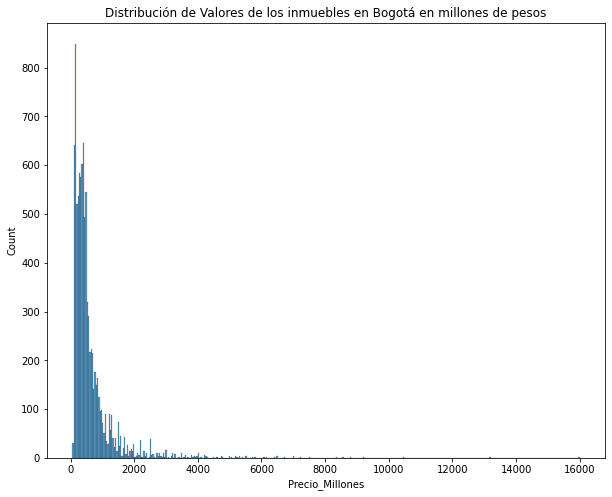

In [89]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millones')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos')
plt.show()

Colocando límites en el eje x  de nuestra gráfica:

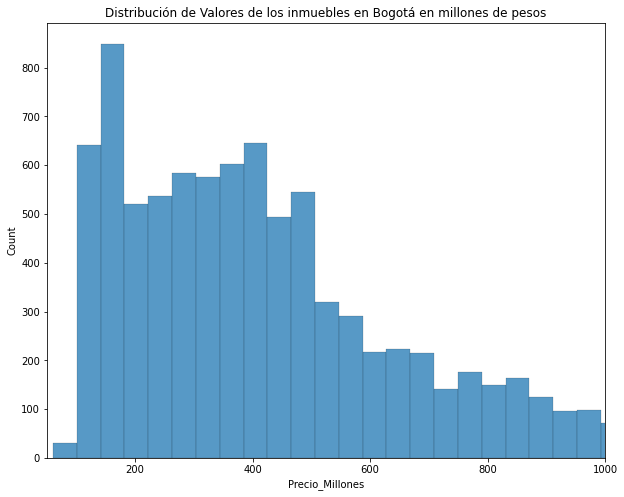

In [90]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millones')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos')
plt.xlim((50,1000))
plt.show()

Agrgando una curva de densidad que nos ayudará en la interpretación.

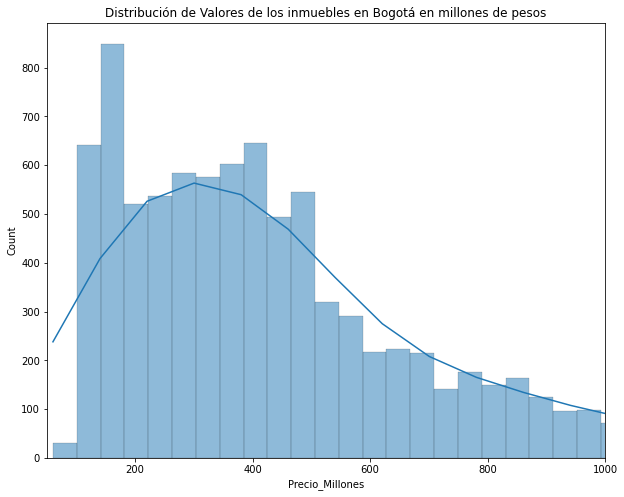

In [91]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millones', kde=True)
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos')
plt.xlim((50,1000))
plt.show()

Para guardar un gráfico se utiliza la función savefig donde hay que pasar como parámetro la ruta donde se quiere guardar y el formato.

Adicional se va incluir en la gráfica otro elemento que está relacionado con el tipo de inmuebles, esto se hace con el parámetro hue

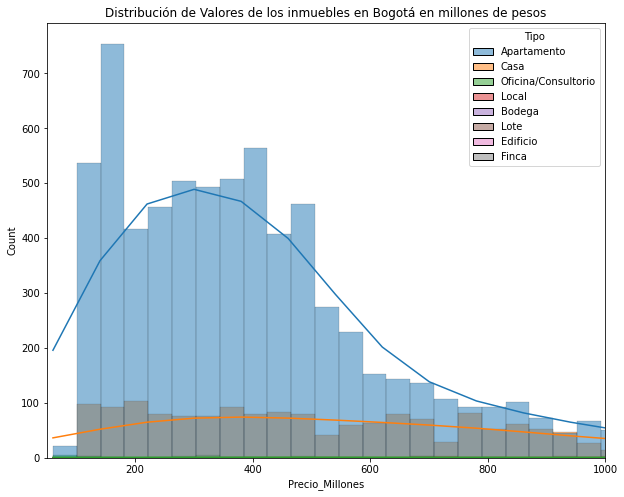

In [92]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millones', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos')
plt.xlim((50,1000))
plt.savefig('/content/drive/MyDrive/CURSOS/ALURA/InmersionPython/2_clase02/histograma_precios_inmuebles.png', format='png')
plt.show()

<H1>DESAFIOS

1.   HACER EL HISTOGRAMA UTILIZANDO SOLO TRES TIPOS DE INMUEBLES, APARTAMENTOS, FINCAS Y CASAS
2.   REFINAR EL GRÁFICO EN CUANTO A LABELS Y SACAR UNA CONCLUSIÓN O ANALISIS DEL GRÁFICO
3. PRECIO DEL M2 POR BARRIO Y MOSTRARLO EN UN GRÁFICO.


1. Histograma con filtro de casas, apartamentos y fincas

In [93]:
inmuebles_filtrado = inmuebles[inmuebles['Tipo'].isin([ 'Casa', 'Apartamento','Finca'])]
inmuebles_filtrado

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millones
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00
...,...,...,...,...,...,...,...,...,...,...,...
9514,Casa,Casa en venta en Kennedy,4,2,240,Kennedy,Kennedy Central,$ 555.000.000,$,555000000,555.00
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,290.00
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,670.00
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,335.00


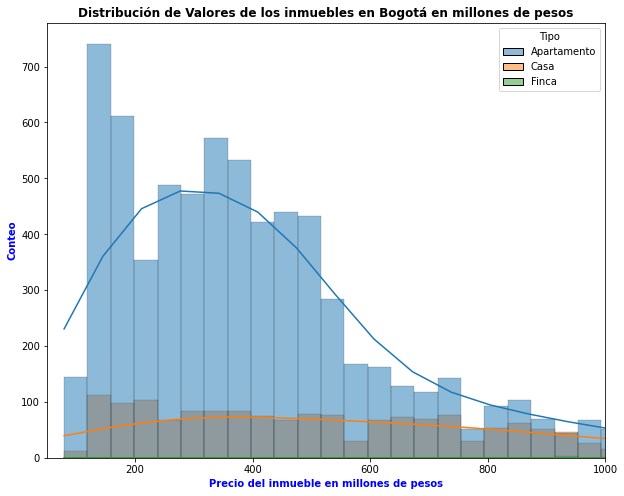

In [94]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles_filtrado, x='Precio_Millones', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá en millones de pesos', fontweight = 'bold')
ax = plt.gca()
ax.set_xlabel('Precio del inmueble en millones de pesos', color = 'blue', fontweight = 'bold')
ax.set_ylabel('Conteo', color = 'blue', fontweight = 'bold')
plt.xlim((50,1000))
plt.savefig('/content/drive/MyDrive/CURSOS/ALURA/InmersionPython/2_clase02/histograma_precios_inmuebles2.png', format='png')
plt.show()

2. La gráfica nos muestra que la mayor cantidad de inmuebles son apartamentos que se encuentran entre 100 y 500 millones de pesos. Por otro lado las casas ocupan el segundo lugar en cantidad más o menos cien casas distribuidas en precios que van desde los 100 millones y hasta los 850 millones, siendo las casas más con menos apariciones las que se encuentran en valores cercanos a los seisienos y ochocientos millones de pesos

3. Precio del metro cuadrado por barrio

In [127]:
inmuebles['Precio_m2'] = inmuebles.Precio_Millones/inmuebles.Area
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millones,Precio_m2
934,Apartamento,Apartamento en venta en Bella Suiza,1,2,61,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 421.000.000,$,421000000,421.00,6.90
7000,Apartamento,Apartamento en venta en Puente Aranda,3,2,59,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 263.000.000,$,263000000,263.00,4.46
4856,Apartamento,Apartamento en venta en Cedritos,2,2,75,Cedritos,Usaquén,$ 440.000.000,$,440000000,440.00,5.87
6192,Apartamento,Apartamento en venta en Cedritos,3,2,109,Cedritos,Usaquén,$ 550.000.000,$,550000000,550.00,5.05
3242,Apartamento,Apartamento en venta en Portales Del Norte,3,2,86,Portales Del Norte,Britalia,$ 404.000.000,$,404000000,404.00,4.70


In [128]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millones,Precio_m2
count,9520.00,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06,5.01
std,2.05,1.26,1731.38,704.60,2.37
min,1.00,0.00,2.00,60.00,0.01
25%,2.00,2.00,57.00,250.00,3.48
50%,3.00,2.00,80.00,409.18,4.67
75%,3.00,3.00,135.00,680.00,6.12
max,110.00,9.00,166243.00,16000.00,90.00


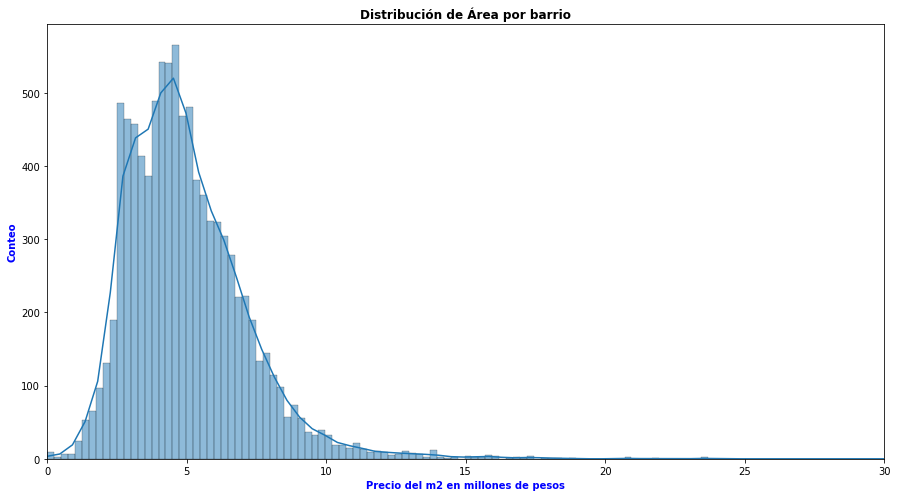

In [129]:
plt.figure(figsize=(15,8))
grafica = sns.histplot(data=inmuebles, x='Precio_m2', kde=True)
grafica.set_title('Distribución de Área por barrio', fontweight = 'bold')
ax = plt.gca()
ax.set_xlabel('Precio del m2 en millones de pesos', color = 'blue', fontweight = 'bold')
ax.set_ylabel('Conteo', color = 'blue', fontweight = 'bold')
plt.xlim((0,30))
plt.savefig('/content/drive/MyDrive/CURSOS/ALURA/InmersionPython/2_clase02/histograma_precios_inmuebles3.png', format='png')
plt.show()

In [133]:
barrio_area_graf = inmuebles[['Barrio', 'Precio_m2']]
barrio_area_graf

,Barrio,Precio_m2
0,Zona Noroccidental,5.14
1,Castilla,3.94
2,Chico Reservado,7.78
3,Usaquén,5.78
4,Bella Suiza,7.58
...,...,...
9515,Kennedy,4.14
9516,Parque Central Bavaria,6.70
9517,Restrepo,2.35
9518,Engativa,1.83


In [122]:
barrio_area_graf = inmuebles[['Barrio', 'Precio_m2']].groupby('Barrio').mean()
barrio_area_graf.sort_values('Precio_m2')

,Precio_m2
Barrio,
Bosa Piamonte,1.18
Roma,1.35
Libertador,1.66
Las Ferias,1.72
Santa Librada,1.95
...,...
Los Rosales,8.17
Chico Norte,8.54
La Merced,8.98


<Axes: xlabel='Barrio'>

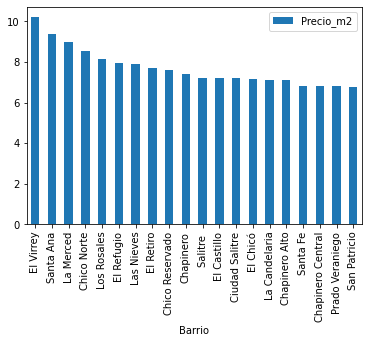

In [105]:
barrio_area_graf.sort_values('Precio_m2',ascending=False).head(20).plot.bar()

<Axes: xlabel='Barrio'>

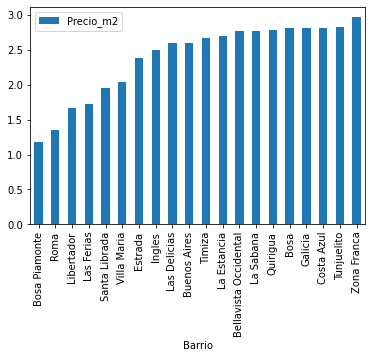

In [106]:
barrio_area_graf.sort_values('Precio_m2',ascending=True).head(20).plot.bar()